**GATHER DATA**

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [5]:
consumer_key = '******'
consumer_secret = '******'
access_token = '******'
access_secret = '******'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = twitter_archive.tweet_id.values

with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError:
            print('Error: tweet missing')

Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 2
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Error: tweet missing
Rate limit reached. Sleeping for: 726
Error: tweet missing
Rate limit reached. Sleeping for: 727


In [6]:
tweets_list =[]

with open('tweet_json.txt') as json_file:
    for line in json_file:
    
        tweets_dict = {}
        tweets_json = json.loads(line)
        
        try:
            tweets_dict['tweet_id'] = tweets_json['extended_entities']['media'][0]['id']
        except:
            tweets_dict['tweet_id'] = 'na'

        tweets_dict['retweet_count'] = tweets_json['retweet_count']
        tweets_dict['favorite_count'] = tweets_json['favorite_count']
        
        tweets_list.append(tweets_dict)

In [9]:
tweets_df = pd.DataFrame(tweets_list)

**Assessing Data: Quality and Tidiness Issues**

**Twitter archive data:**

In [10]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_archive.head(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   
5  891087950875897856                    NaN                  NaN   
6  890971913173991426                    NaN                  NaN   
7  890729181411237888                    NaN                  NaN   
8  890609185150312448                    NaN                  NaN   
9  890240255349198849                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   
5  2017-07-29 00:08:17 +0000   
6  2017-07-28 16:27:12 +0000   
7  2017-07-28 00:22:40 +0000   
8  2017-07-27 16:25:51 +0000   
9  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   
5  Here we have a majestic great white breaching ...                  NaN   
6  Meet Jax. He enjoys ice cream so much he gets ...                  NaN   
7  When you watch your owner call another dog a g...                  NaN   
8  This is Zoey. She doesn't want to be one of th...                  NaN   
9  This is Cassie. She is a college pup. Studying...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
5                       NaN                        NaN   
6                       NaN                        NaN   
7                       NaN                        NaN   
8                       NaN                        NaN   
9                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   
5  https://twitter.com/dog_rates/status/891087950...                13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                13   
7  https://twitter.com/dog_rates/status/890729181...                13   
8  https://twitter.com/dog_rates/status/890609185...                13   
9  https://twitter.com/dog_rates/status/890240255...    

In [12]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
print(twitter_archive.doggo.value_counts())
print()
print(twitter_archive.floofer.value_counts())
print()
print(twitter_archive.pupper.value_counts())
print()
print(twitter_archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64

None       2346
floofer      10
Name: floofer, dtype: int64

None      2099
pupper     257
Name: pupper, dtype: int64

None     2326
puppo      30
Name: puppo, dtype: int64


In [16]:
twitter_archive.retweeted_status_id.notnull().sum()

181

In [17]:
twitter_archive.in_reply_to_status_id.notnull().sum()

78

In [18]:
twitter_archive[185:190]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
185  856330835276025856                    NaN                  NaN   
186  856288084350160898           8.562860e+17          279280991.0   
187  856282028240666624                    NaN                  NaN   
188  855862651834028034           8.558616e+17          194351775.0   
189  855860136149123072           8.558585e+17           13615722.0   

                     timestamp  \
185  2017-04-24 02:15:55 +0000   
186  2017-04-23 23:26:03 +0000   
187  2017-04-23 23:01:59 +0000   
188  2017-04-22 19:15:32 +0000   
189  2017-04-22 19:05:32 +0000   

                                                source  \
185  <a href="http://twitter.com/download/iphone" r...   
186  <a href="http://twitter.com/download/iphone" r...   
187  <a href="http://twitter.com/download/iphone" r...   
188  <a href="http://twitter.com/download/iphone" r...   
189  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
185  RT @Jenna_Marbles: @dog_rates Thanks for ratin...         8.563302e+17   
186  @xianmcguire @Jenna_Marbles Kardashians wouldn...                  NaN   
187  This is Cermet, Paesh, and Morple. They are ab...                  NaN   
188  @dhmontgomery We also gave snoop dogg a 420/10...                  NaN   
189  @s8n You tried very hard to portray this good ...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
185                66699013.0  2017-04-24 02:13:14 +0000   
186                       NaN                        NaN   
187                       NaN                        NaN   
188                       NaN                        NaN   
189                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
185                                                NaN                14   
186                                                NaN                14   
187  https://twitter.com/dog_rates/status/856282028...                14   
188                                                NaN               420   
189                                                NaN               666   

     rating_denominator    name doggo floofer pupper puppo  
185                  10    None  None    None   None  None  
186                  10    None  None    None   None  None  
187                  10  Cermet  None    None   None  None  
188                  10    None  None    None   None  None  
189                  10    None  None    None   None  None

In [19]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Assessments for quality:**

1)There are 23 cases where the denominator of rating != 10. These entries will be removed. It is possible some of these entries are genuine tweets, in which case each of these entries would have to be inspected individually. However, these cases only account for a small fraction of the data set and can be set aside for now. If time allows, I will then inspect the 23 cases in search of genuine tweets.

2)Multiple cases of where the numerator of rating < 10. These entries will be removed.

3)Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic

4)Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name",

5)Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.

6)Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.

**Assessments for tidiness:**

 Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.

**Cleaning Data**

In [20]:
twitter_archive_clean = twitter_archive.copy()

**Quality Issues 1 = Removing multiple cases of where the denominator of rating != 10.**

In [21]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].index, inplace = True)

**test**

In [22]:
twitter_archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

**Quality issue 2 = twitter_archive_clean.rating_denominator.value_counts()**

In [23]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator < 10].index, inplace = True)

**test**

In [24]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

 I have decided to carry out steps 1) and 2) in tidiness first and then return to 3) as this will likely remove many of the values present in assessment 3)

**Quality issue 3  = Multiple cases where numerator of rating >> 10. These entries will be assessed and removed if not authentic.** 

In [25]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      463
10      461
13      351
14       54
420       2
75        2
15        2
1776      1
666       1
182       1
27        1
26        1
17        1
Name: rating_numerator, dtype: int64

**test**

 5 cases where the numerator is exceptionally high (> 14)

In [26]:
nums = [420, 1776,75,27,26]

for j in nums:
    print(f'Rating number: {j}')
    for i in range(0,len(twitter_archive.index)):
        if twitter_archive.rating_numerator[i] == j:
            print(twitter_archive.tweet_id[i])
            print(twitter_archive.text[i])
            print(twitter_archive.expanded_urls[i])
            print(twitter_archive.retweeted_status_id[i])
            print(twitter_archive.in_reply_to_status_id[i])
            print(twitter_archive.source[i])
            print(twitter_archive.index[i])
            print()
            print()
        else:
            pass

Rating number: 420
855862651834028034
@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
nan
nan
8.55861584463e+17
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
188


670842764863651840
After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY
https://twitter.com/dog_rates/status/670842764863651840/photo/1
nan
nan
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2074


Rating number: 1776
749981277374128128
This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
https://twitter.com/dog_rates/status/749981277374128128/photo/1
nan
nan
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
979


Rating number: 75
832215909146226688
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
https://twitter.com/dog_rates/status/78

**code**
All 5 cases appear to be genuine. However, the numerator value is incorrect for some and will be updated

In [27]:
nums = [75,27,26]
correct_vals = [9.75, 11.27, 11.26]
index_list = []


for i in nums:
    index_list.append(twitter_archive_clean[twitter_archive_clean.rating_numerator == i].index[0])


for i,j in zip(index_list,correct_vals):
    twitter_archive_clean.at[i, 'rating_numerator'] = j

**test**

In [28]:
twitter_archive_clean.rating_numerator.value_counts()

12      558
11      465
10      461
13      351
14       54
420       2
15        2
1776      1
666       1
182       1
75        1
17        1
9         1
Name: rating_numerator, dtype: int64

**Quality issue 4 = Rename columns with more appropriate names: "timestamp" to "tweet_timestamp", "text" to "tweet_text", "rating_numerator" to "dog_rating_out_of_ten", "name" to "dog_name"**

In [29]:
new_names = {'timestamp': 'tweet_timestamp', 'text': 'tweet_text',\
             'rating_numerator': 'dog_rating_out_of_ten', 'name': 'dog_name'}


twitter_archive_clean.rename(columns=new_names, inplace=True)

**test**

In [30]:
list(twitter_archive_clean.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**Quality issue 5 = Since retweets and replies will be removed, the column "retweeted_status_timestamp" will be removed as it will no longer provide any useful information.**
**Quality issue 6 = Remove column "rating_denominator" once all the values that != 10 have been removed since this will no longer provide any useful information.


In [31]:
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator']


twitter_archive_clean.drop(drop_cols, inplace=True, axis=1)

**test**

In [40]:
list(twitter_archive_clean.columns)

['tweet_id',
 'tweet_timestamp',
 'source',
 'tweet_text',
 'expanded_urls',
 'dog_rating_out_of_ten',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**tidiness issue 2 =  Change columns "doggo", "floofer", "pupper", and "puppo" from wide to long format.**


In [41]:
twitter_archive_clean = twitter_archive_clean.reset_index()
del twitter_archive_clean['index']

In [42]:
twitter_archive_clean['dog_category'] = 'NaN'

Creating a single column for dog category

In [43]:
for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.loc[i, 'doggo'] == 'doggo':
        twitter_archive_clean.loc[i, 'dog_category'] = 'doggo'
    elif twitter_archive_clean.loc[i, 'floofer'] == 'floofer':
        twitter_archive_clean.loc[i, 'dog_category'] = 'floofer'
    elif twitter_archive_clean.loc[i, 'pupper'] == 'pupper':
        twitter_archive_clean.loc[i, 'dog_category'] = 'pupper'
    elif twitter_archive_clean.loc[i, 'puppo'] == 'puppo':
        twitter_archive_clean.loc[i, 'dog_category'] = 'puppo'
    else:
        twitter_archive_clean.loc[i, 'dog_category'] = 'None'

Checking for entries labelled with multiple categories

In [44]:
multi_cat_list = []

for i in range(0, len(twitter_archive_clean.index)):
    if twitter_archive_clean.doggo[i] == 'doggo' and (twitter_archive_clean.floofer[i] == 'floofer' \
                                                   or twitter_archive_clean.pupper[i] == 'pupper'\
                                                   or twitter_archive_clean.puppo[i] == 'puppo'):
        multi_cat_list.append(i)

print(multi_cat_list)
print(len(multi_cat_list))

[190, 199, 453, 521, 555, 565, 693, 720, 762, 804, 866, 1016, 1056]
13


10 cases of multiple categories found 
Checking text of entry to correct category to correct values

In [45]:
# Index 153    
twitter_archive_clean.loc[153, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 153, dtype: object

In [46]:
twitter_archive_clean.tweet_text[153]

"We only rate dogs. Please don't send perfectly toasted marshmallows attempting to drive. Thank you... 13/10 https://t.co/nvZyyrp0kd"

In [47]:
# Incorreclty labelled as "doggo", correcting to "puppo"

twitter_archive_clean.loc[153, 'dog_category'] = 'puppo'

In [48]:
# Index 160
twitter_archive_clean.loc[160, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 160, dtype: object

In [49]:
twitter_archive_clean.tweet_text[160]

"Meet Lorenzo. He's an avid nifty hat wearer and absolute 13/10, but he needs your help to beat cancer. Link below\n\nhttps://t.co/qZdSdzm08p https://t.co/oDIQ1KkdPt"

In [50]:
# Correcting to "floofer"
twitter_archive_clean.loc[160, 'dog_category'] = 'floofer'

In [51]:
# Index 354
twitter_archive_clean.loc[354, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           doggo
floofer          None
pupper           None
puppo            None
dog_category    doggo
Name: 354, dtype: object

In [52]:
twitter_archive_clean.tweet_text[354]

"RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR"

In [53]:
# Correcting to "pupper"
twitter_archive_clean.loc[354, 'dog_category'] = 'pupper'

In [54]:
# Index 411 
twitter_archive_clean.loc[411, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 411, dtype: object

In [55]:
twitter_archive_clean.tweet_text[411]

'This is Paisley. She really wanted to be president this time. Dreams officially crushed. 13/10 https://t.co/liJGwMp17E'

In [56]:
# Correcting and adding category to represent that there is multiple dogs/categories present: "multiple"
twitter_archive_clean.loc[411, 'dog_category'] = 'multiple'

In [57]:
# Index 441 
twitter_archive_clean.loc[441, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           doggo
floofer          None
pupper           None
puppo            None
dog_category    doggo
Name: 441, dtype: object

In [58]:
twitter_archive_clean.tweet_text[441]

'This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb'

In [59]:
# Correcting to "pupper"
twitter_archive_clean.loc[441, 'dog_category'] = 'pupper'

In [60]:
# Index 531
twitter_archive_clean.loc[531, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 531, dtype: object

In [61]:
twitter_archive_clean.tweet_text[531]

"RT @dog_rates: This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu"

In [62]:
# Index 556 
twitter_archive_clean.loc[556, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 556, dtype: object

In [63]:
twitter_archive_clean.tweet_text[556]

"RT @dog_rates: Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5"

In [64]:
# Correcting to "multiple"
twitter_archive_clean.loc[556, 'dog_category'] = 'multiple'

In [65]:
# Index 677
twitter_archive_clean.loc[677, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo            None
floofer          None
pupper           None
puppo           puppo
dog_category    puppo
Name: 677, dtype: object

In [66]:
twitter_archive_clean.tweet_text[677]

'This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp'

In [67]:
# Correcting to "multiple"
twitter_archive_clean.loc[677, 'dog_category'] = 'multiple'

In [68]:
# Index 813
twitter_archive_clean.loc[813, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 813, dtype: object

In [69]:
twitter_archive_clean.tweet_text[813]

'This is Lou. His sweater is too small and he already cut the tags off. Very very churlish. 10/10 would still pet https://t.co/dZPMLresEr'

In [70]:
# Correcting to "multiple"
twitter_archive_clean.loc[813, 'dog_category'] = 'multiple'

In [71]:
# Index 852
twitter_archive_clean.loc[852, ['doggo', 'floofer', 'pupper', 'puppo', 'dog_category']]

doggo           None
floofer         None
pupper          None
puppo           None
dog_category    None
Name: 852, dtype: object

In [72]:
twitter_archive_clean.tweet_text[852]

"Meet Bonaparte. He's pupset because it's cloudy at the beach. Can't take any pics for his Instagram. 11/10 https://t.co/0THNOfv2Jo"

In [73]:
# Correcting to "multiple"
twitter_archive_clean.loc[852, 'dog_category'] = 'multiple'

In [74]:
# dropping original dog category columns

# Test
drop_cats = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(drop_cats, axis=1, inplace=True)
twitter_archive_clean.head()

tweet_id            tweet_timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                          tweet_text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  dog_rating_out_of_ten  \
0  https://twitter.com/dog_rates/status/892420643...                     13   
1  https://twitter.com/dog_rates/status/892177421...                     13   
2  https://twitter.com/dog_rates/status/891815181...                     12   
3  https://twitter.com/dog_rates/status/891689557...                     13   
4  https://twitter.com/dog_rates/status/891327558...                     12   

   dog_name dog_category  
0   Phineas         None  
1     Tilly         None  
2    Archie         None  
3     Darla         None  
4  Franklin         None

**Image prediction data:**

In [75]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
image_predictions.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [77]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [80]:
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

**Assessments for quality:**

1) Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.

2)The "p1" and "p1_conf" columns will be renamed with more explanatory titles.

3) The column "jpg_url" will be removed since url data is already contained in the twitter archive data

4)The "p2" and "p3" related columns will be removed as I am only using the most likely prediction ("p1") in my analysis

5)After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.

**Quality issue 1 = Entries where the first (i.e. most confident prediction) has a False value for "p1_dog" (i.e. does not correspond to a type of dog) will be removed.** 

In [84]:
image_predictions.drop(image_predictions[image_predictions.p1_dog == False].index, inplace=True)

In [85]:
image_predictions.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

**Quality issue 2 = The "p1" and "p1_conf" columns will be renamed with more explanatory titles.**

In [86]:
new_col_names = {'p1':'dog_breed_prediction', 'p1_conf':'prediction_confidence'}

image_predictions.rename(columns= new_col_names, inplace=True)

In [87]:
list(image_predictions.columns)

['tweet_id',
 'jpg_url',
 'img_num',
 'dog_breed_prediction',
 'prediction_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

**Quality issue 3 = The column "jpg_url" will be removed since url data is already contained in the twitter archive data (expanded_urls)**

**Quality issue 4 =The p2 and p3 related columns will be removed as I am only using the most likely prediction ("p1") in my analysis**

**Quality issue 5 = After removal of "False" entries, the "p1_dog" column will be removed as it will no longer add any valuable information.**


In [88]:
preds_drop_cols = ['jpg_url', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p2_conf', 'p3_dog', 'p3_conf']

image_predictions.drop(preds_drop_cols, inplace=True, axis=1)

In [89]:
list(image_predictions.columns)

['tweet_id', 'img_num', 'dog_breed_prediction', 'prediction_confidence']

**Retweet/Favourite count data**

In [90]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
favorite_count    2334 non-null int64
retweet_count     2334 non-null int64
tweet_id          2334 non-null object
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [91]:
tweets_df.head(10)

favorite_count  retweet_count            tweet_id
0           37411           8122  892420639486877696
1           32148           6017  892177413194625024
2           24238           3982  891815175371796480
3           40714           8283  891689552724799489
4           38951           8976  891327551943041024
5           19565           2980  891087942176911360
6           11429           1975  890971906207338496
7           63068          18067  890729118844600320
8           26921           4087  890609177319665665
9           30852           7055  890240245463175168

In [92]:
tweets_df.favorite_count.describe()

count      2334.000000
mean       7796.628963
std       12099.887854
min           0.000000
25%        1354.250000
50%        3395.500000
75%        9562.500000
max      161582.000000
Name: favorite_count, dtype: float64

In [93]:
tweets_df.retweet_count.describe()

count     2334.000000
mean      2849.491431
std       4824.363130
min          1.000000
25%        574.250000
50%       1334.000000
75%       3327.250000
max      81905.000000
Name: retweet_count, dtype: float64

In [94]:
tweets_df.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

**Assessments for quality and tidiness:**
         After trying to merge the data, it appears that there is some non-numeric values for the "tweet_id" inputs which will need to be removed.

In [95]:
tweets_df_clean = tweets_df.copy()

**Quality issue = Finding non-numeric values for "tweet_id"**


In [96]:
nn_index_list = []

for i in range(0, len(tweets_df_clean.tweet_id)):
    if type(tweets_df_clean.tweet_id[i]) != int:
        nn_index_list.append(i)

In [97]:
print(len(nn_index_list))


272


In [98]:
tweets_df_clean.shape

(2334, 3)

In [99]:
for i in nn_index_list:
    tweets_df_clean.drop(tweets_df_clean[tweets_df_clean.index == i].index, inplace=True)

In [100]:
tweets_df_clean.shape

(2062, 3)

In [103]:
tweets_df_clean = tweets_df_clean.reset_index()
del tweets_df_clean['index']

**Combining Data**

In [104]:
master_df_pt1 = pd.merge(twitter_archive_clean, image_predictions, on='tweet_id', how='left')

In [107]:
tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(np.int64)
master_df_pt1['tweet_id']=master_df_pt1['tweet_id'].astype(np.int64)

tweets_df_clean['tweet_id']=tweets_df_clean['tweet_id'].astype(int)
master_df_pt1['tweet_id']=master_df_pt1['tweet_id'].astype(int)

In [110]:
master_df_pt1.to_csv('twitter_archive_master.csv')
twitter_archive_clean.to_csv('clean_twitter_archive_data.csv')
image_predictions.to_csv('clean_image_prediction_data.csv')
tweets_df_clean.to_csv('clean_rt_and_fav_data.csv')

**Analysis**

In [111]:
master_df_pt1.head(10)

tweet_id            tweet_timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   
5  891087950875897856  2017-07-29 00:08:17 +0000   
6  890971913173991426  2017-07-28 16:27:12 +0000   
7  890729181411237888  2017-07-28 00:22:40 +0000   
8  890609185150312448  2017-07-27 16:25:51 +0000   
9  890240255349198849  2017-07-26 15:59:51 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/iphone" r...   
6  <a href="http://twitter.com/download/iphone" r...   
7  <a href="http://twitter.com/download/iphone" r...   
8  <a href="http://twitter.com/download/iphone" r...   
9  <a href="http://twitter.com/download/iphone" r...   

                                          tweet_text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   
5  Here we have a majestic great white breaching ...   
6  Meet Jax. He enjoys ice cream so much he gets ...   
7  When you watch your owner call another dog a g...   
8  This is Zoey. She doesn't want to be one of th...   
9  This is Cassie. She is a college pup. Studying...   

                                       expanded_urls  dog_rating_out_of_ten  \
0  https://twitter.com/dog_rates/status/892420643...                     13   
1  https://twitter.com/dog_rates/status/892177421...                     13   
2  https://twitter.com/dog_rates/status/891815181...                     12   
3  https://twitter.com/dog_rates/status/891689557...                     13   
4  https://twitter.com/dog_rates/status/891327558...                     12   
5  https://twitter.com/dog_rates/status/891087950...                     13   
6  https://gofundme.com/ydvmve-surgery-for-jax,ht...                     13   
7  https://twitter.com/dog_rates/status/890729181...                     13   
8  https://twitter.com/dog_rates/status/890609185...                     13   
9  https://twitter.com/dog_rates/status/890240255...                     14   

   dog_name dog_category  img_num      dog_breed_prediction  \
0   Phineas         None      NaN                       NaN   
1     Tilly         None      1.0                 Chihuahua   
2    Archie         None      1.0                 Chihuahua   
3     Darla         None      NaN                       NaN   
4  Franklin         None      2.0                    basset   
5      None         None      1.0  Chesapeake_Bay_retriever   
6       Jax         None      1.0               Appenzeller   
7      None         None      2.0                Pomeranian   
8      Zoey         None      1.0             Irish_terrier   
9    Cassie        doggo      1.0                  Pembroke   

   prediction_confidence  
0                    NaN  
1               0.323581  
2               0.716012  
3                    NaN  
4               0.555712  
5               0.425595  
6               0.341703  
7               0.566142  
8               0.487574  
9               0.511319

In [112]:
master_df_pt1.dog_category.value_counts()

None        1561
pupper       205
doggo         90
puppo         28
floofer       10
multiple       5
Name: dog_category, dtype: int64

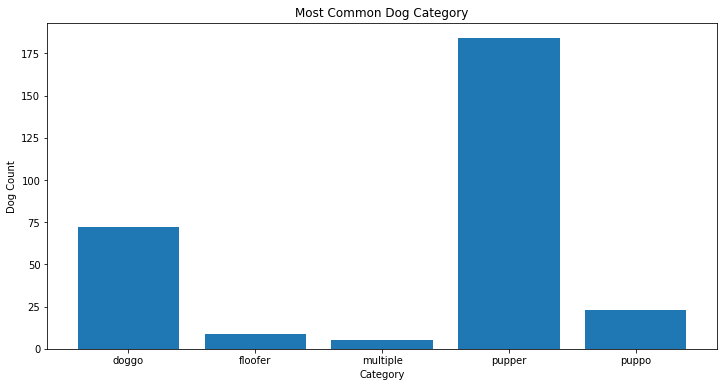

In [113]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 72, 23, 9, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

In [114]:
master_df_pt1.dog_rating_out_of_ten.describe()

count    1899.000000
mean       13.341232
std        45.357269
min         9.000000
25%        11.000000
50%        12.000000
75%        12.000000
max      1776.000000
Name: dog_rating_out_of_ten, dtype: float64

In [115]:
master_df_pt1.dog_breed_prediction.value_counts()

golden_retriever                  139
Labrador_retriever                 89
Pembroke                           84
Chihuahua                          67
chow                               44
pug                                43
Samoyed                            42
Pomeranian                         38
toy_poodle                         34
cocker_spaniel                     28
malamute                           27
French_bulldog                     20
Chesapeake_Bay_retriever           20
Eskimo_dog                         18
Cardigan                           18
Siberian_husky                     18
miniature_pinscher                 18
Staffordshire_bullterrier          17
German_shepherd                    17
Rottweiler                         15
kuvasz                             14
Shih-Tzu                           14
beagle                             14
Maltese_dog                        13
Shetland_sheepdog                  13
Lakeland_terrier                   13
Great_Pyrene

In [116]:
tweets_df_clean.retweet_count.describe()

count     2062.000000
mean      2726.473327
std       4767.644379
min         11.000000
25%        581.250000
50%       1284.500000
75%       3132.000000
max      81905.000000
Name: retweet_count, dtype: float64

In [117]:
tweets_df_clean.favorite_count.describe()

count      2062.000000
mean       8231.768671
std       12432.710003
min           0.000000
25%        1567.250000
50%        3635.500000
75%       10283.250000
max      161582.000000
Name: favorite_count, dtype: float64

The most popular dog type is a "pupper"
The most popular dog, based on image predictions, is a Golden Retriever
The median and mean ratings out of ten are 11 and 12.7 respectively
The median and mean retweet count is 1337 and 2837 respectively
The median and mean favorite count is 3744 and 8490 respectively